In [20]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def evaluation():
    predictions = model.predict(X_test)

    recall = np.around(recall_score(y_test, predictions, average='micro'), decimals=3)
    precision = np.around(precision_score(y_test, predictions, average='micro'), decimals=3)
    f1 = np.around(f1_score(y_test, predictions, average="micro"), decimals=3)

    return recall, precision, f1

In [41]:
def save_predicted_data_into_structured_df(df, model):
    recall, precision, f1 = evaluation()
    return df.append({'model':model, 'recall':recall, 'precision':precision, 'f1':f1}, ignore_index=True)

bal_scores = pd.DataFrame(columns=['model', 'recall', 'precision', 'f1'])

In [85]:
def cnf_matrix(cls):
    predictions = model.predict(X_test)
    cnf = confusion_matrix(y_test, predictions)
    ax= plt.subplot()
    plt.figure(figsize=(5,5))  
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax, fmt='d'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)

In [5]:
data = pd.DataFrame(pd.read_csv('DE_attribution'))
data

,Unnamed: 0,manhattan,cosine,euclidean,label,author
0,"Schopenhauer,-Johanna_Richard Wood.txt",0.00,0.00,0.00,same,Schopenhauer
1,"Schopenhauer,-Johanna_Die Tante.txt",1249.57,0.49,40.74,same,Schopenhauer
2,"Schopenhauer,-Johanna_Gabriele.txt",1346.51,0.53,44.11,same,Schopenhauer
3,"Gutzkow,-Karl_Die Ritter vom Geiste.txt",1570.48,1.04,49.39,different,Gutzkow
4,"Gutzkow,-Karl_Der Zauberer von Rom.txt",1595.14,0.96,50.85,different,Gutzkow
...,...,...,...,...,...,...
5924,"Fontane,-Theodor_Irrungen Wirrungen.txt",2601.44,1.16,82.71,different,Fontane
5925,"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",2610.78,0.98,83.27,different,Fischer
5926,"Freytag,-Gustav_Die Ahnen.txt",2630.41,1.19,81.60,different,Freytag
5927,"Marlitt,-Eugenie_Die Frau mit den Karfunkelste...",2673.07,1.27,82.10,different,Marlitt


In [32]:
X = data['cosine'].values.reshape(-1,1)
y = data['label']

array([[0.  ],
       [0.49],
       [0.53],
       ...,
       [1.19],
       [1.27],
       [1.28]])

In [35]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        ],
       [0.37121212],
       [0.40151515],
       ...,
       [0.90151515],
       [0.96212121],
       [0.96969697]])

In [36]:
y = LabelEncoder().fit_transform(data['label'])

In [37]:
print(X.shape)
y.shape

(5929, 1)


(5929,)

In [38]:
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = logreg.fit(X_train, y_train)

/home/teresa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
bal_scores = save_predicted_data_into_structured_df(bal_scores, 'Logistic Regression')
bal_scores

,model,recall,precision,f1
0,Logistic Regression,0.988,0.988,0.988


In [66]:
cls = np.unique(data['label'])

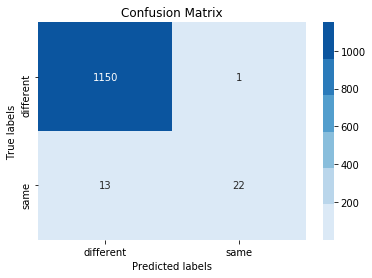

<Figure size 360x360 with 0 Axes>

In [86]:
cnf_matrix(cls)

In [49]:
cnf

array([[1150,    1],
       [  13,   22]])